In [1]:
from music21 import corpus

s = corpus.parse('bach/bwv108.6.xml')

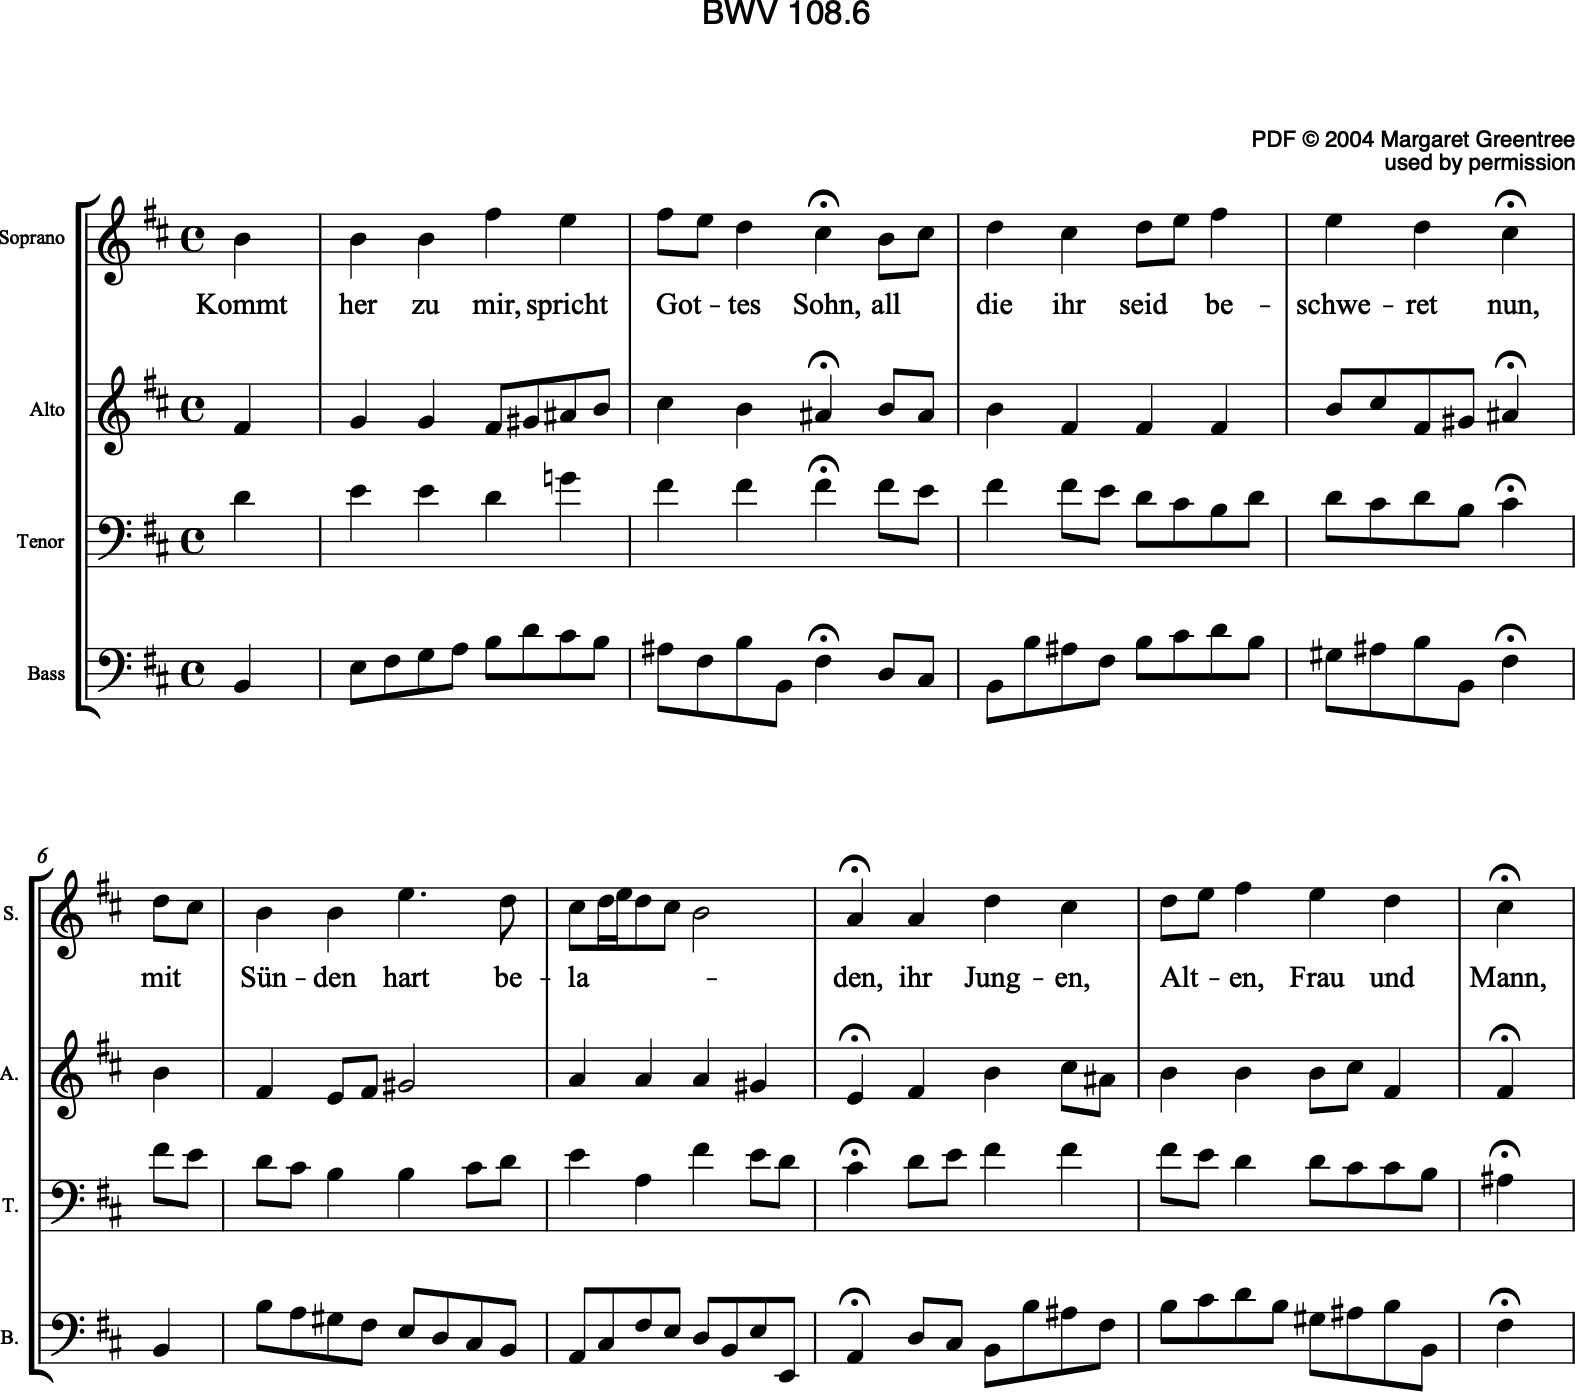

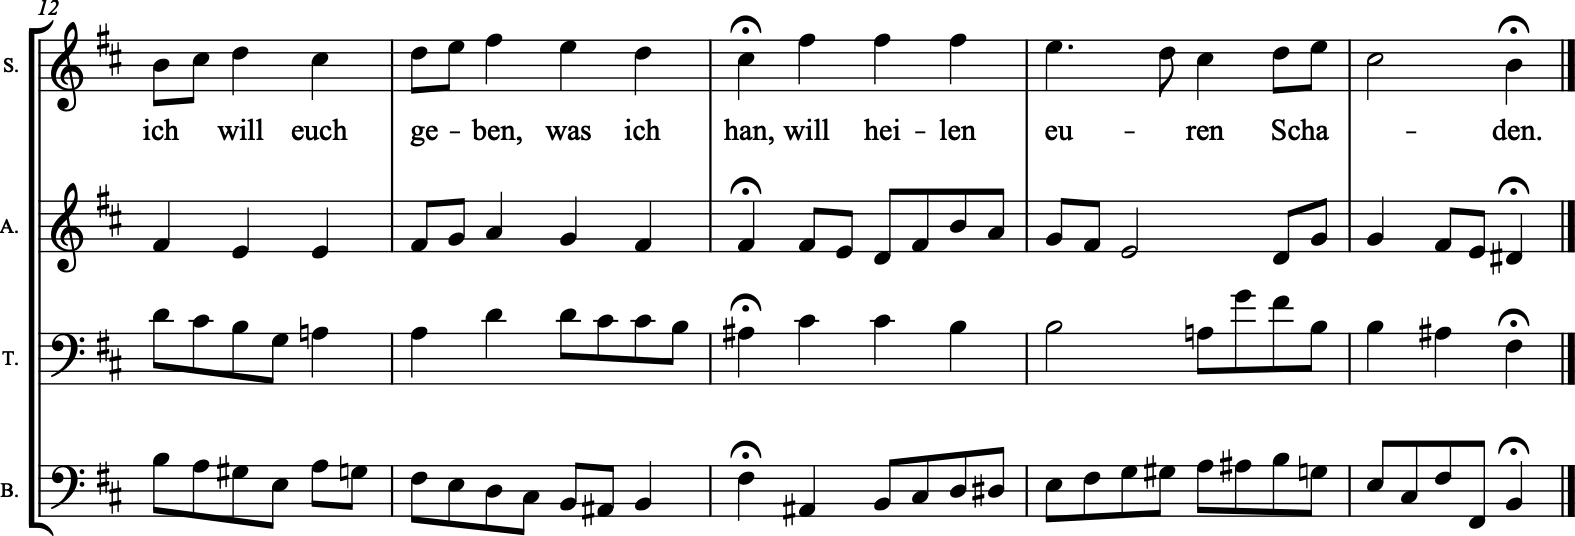

In [3]:
s.show()

In [2]:
s.show('midi')

In [8]:
s.parts[0].show('midi')

In [21]:
from music21 import corpus

# Load the score
s = corpus.parse('bach/bwv108.6.xml')

# Extract notes (pitch and duration)
notes_sequence = []
for note in s.parts[0].flat.notes:
    if note.isNote:
        notes_sequence.append((note.pitch.nameWithOctave, note.quarterLength))
    elif note.isChord:        
        #notes_sequence.append((n.nameWithOctave, note.quarterLength))
        pass

# Print the sequence
pitches = set()
durations = set()
states = set()
notes = []
for pitch, duration in notes_sequence:
    print(f"Pitch: {pitch}, Duration: {duration}")
    pitches.add(pitch)
    durations.add(duration)
    s = (pitch, duration)
    notes.append(s)
    states.add(s)

Pitch: B4, Duration: 1.0
Pitch: B4, Duration: 1.0
Pitch: B4, Duration: 1.0
Pitch: F#5, Duration: 1.0
Pitch: E5, Duration: 1.0
Pitch: F#5, Duration: 0.5
Pitch: E5, Duration: 0.5
Pitch: D5, Duration: 1.0
Pitch: C#5, Duration: 1.0
Pitch: B4, Duration: 0.5
Pitch: C#5, Duration: 0.5
Pitch: D5, Duration: 1.0
Pitch: C#5, Duration: 1.0
Pitch: D5, Duration: 0.5
Pitch: E5, Duration: 0.5
Pitch: F#5, Duration: 1.0
Pitch: E5, Duration: 1.0
Pitch: D5, Duration: 1.0
Pitch: C#5, Duration: 1.0
Pitch: D5, Duration: 0.5
Pitch: C#5, Duration: 0.5
Pitch: B4, Duration: 1.0
Pitch: B4, Duration: 1.0
Pitch: E5, Duration: 1.5
Pitch: D5, Duration: 0.5
Pitch: C#5, Duration: 0.5
Pitch: D5, Duration: 0.25
Pitch: E5, Duration: 0.25
Pitch: D5, Duration: 0.5
Pitch: C#5, Duration: 0.5
Pitch: B4, Duration: 2.0
Pitch: A4, Duration: 1.0
Pitch: A4, Duration: 1.0
Pitch: D5, Duration: 1.0
Pitch: C#5, Duration: 1.0
Pitch: D5, Duration: 0.5
Pitch: E5, Duration: 0.5
Pitch: F#5, Duration: 1.0
Pitch: E5, Duration: 1.0
Pitch: D5, 

In [17]:
sorted(durations)

[0.25, 0.5, 1.0, 1.5, 2.0]

In [18]:
sorted(pitches)

['A4', 'B4', 'C#5', 'D5', 'E5', 'F#5']

In [22]:
len(states), len(notes)

(16, 61)

In [23]:
states

{('A4', 1.0),
 ('B4', 0.5),
 ('B4', 1.0),
 ('B4', 2.0),
 ('C#5', 0.5),
 ('C#5', 1.0),
 ('C#5', 2.0),
 ('D5', 0.25),
 ('D5', 0.5),
 ('D5', 1.0),
 ('E5', 0.25),
 ('E5', 0.5),
 ('E5', 1.0),
 ('E5', 1.5),
 ('F#5', 0.5),
 ('F#5', 1.0)}

In [25]:
from simplemelodygen import markovchain

In [27]:
from music21 import metadata, note, stream
training_data = [note.Note(n[0], quarterLength=n[1])for n in notes]

In [29]:
%%time
model = markovchain.MarkovChainMelodyGenerator(list(states))
model.train(training_data)

generated_melody = model.generate(40)

CPU times: user 2.53 ms, sys: 2.2 ms, total: 4.73 ms
Wall time: 3.04 ms


In [31]:
from music21 import metadata, note, stream

score = stream.Score()
score.metadata = metadata.Metadata(title="Markov Chain Melody - Random Bach")
part = stream.Part()
for n, d in generated_melody:
    part.append(note.Note(n, quarterLength=d))
score.append(part)

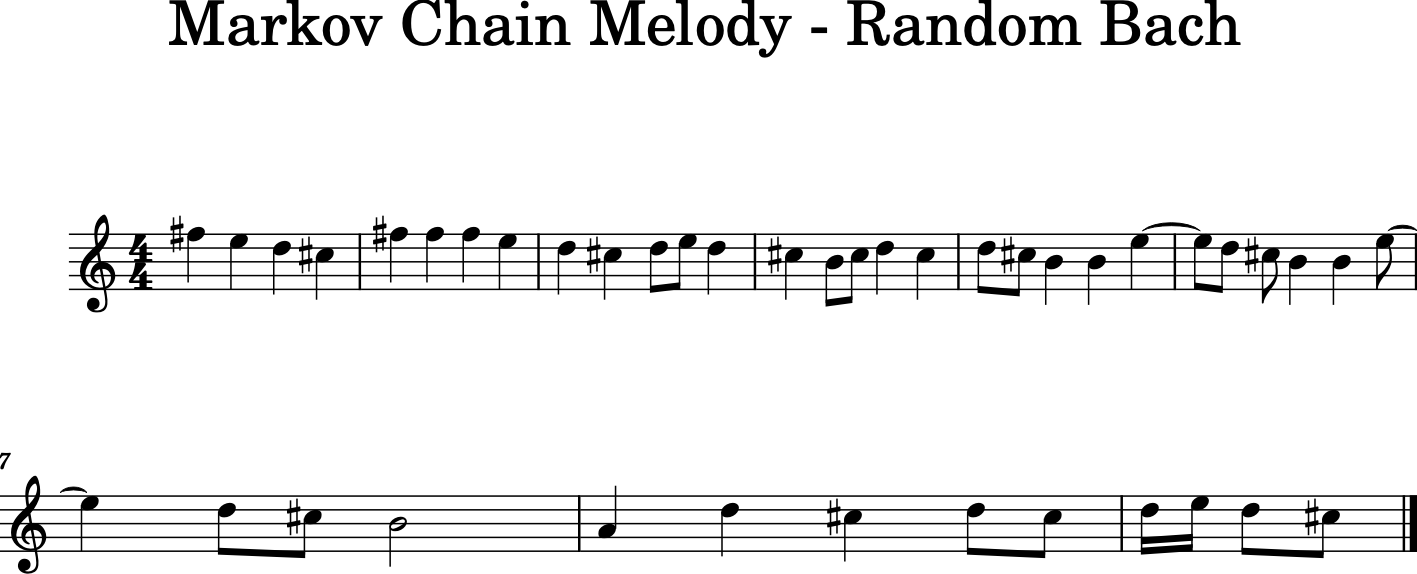

In [32]:
score.show()

In [33]:
score.show('midi')